In [1]:
# 📌 Step 1: Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set plot style
sns.set(style="whitegrid")

# 📌 Step 2: Load Processed Dataset
df = pd.read_csv('../data/processed/final_dataset.csv')
df.head()


,order_id,user_id,product_id,seller,order_date,quantity,is_returned,product_name,category,price,name,city
0,O0001,U0063,P0038,Seller_C,2025-02-03 15:14:48.679629,3,False,Product_38,Beauty,239.15,User_63,New York
1,O0002,U0019,P0019,Seller_B,2025-02-20 15:14:48.679658,3,True,Product_19,Electronics,175.43,User_19,Houston
2,O0003,U0092,P0008,Seller_C,2025-04-18 15:14:48.679664,1,False,Product_8,Home & Kitchen,229.05,User_92,Los Angeles
3,O0004,U0058,P0048,Seller_A,2025-02-20 15:14:48.679669,3,False,Product_48,Beauty,203.12,User_58,Houston
4,O0005,U0055,P0045,Seller_A,2025-02-19 15:14:48.679675,2,True,Product_45,Clothing,37.67,User_55,New York


In [2]:
# 📌 Step 3: Overview
print("Shape:", df.shape)
df.info()
df.describe()
df.isnull().sum()


Shape: (200, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      200 non-null    object 
 1   user_id       200 non-null    object 
 2   product_id    200 non-null    object 
 3   seller        200 non-null    object 
 4   order_date    200 non-null    object 
 5   quantity      200 non-null    int64  
 6   is_returned   200 non-null    bool   
 7   product_name  200 non-null    object 
 8   category      200 non-null    object 
 9   price         200 non-null    float64
 10  name          200 non-null    object 
 11  city          200 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 17.5+ KB


order_id        0
user_id         0
product_id      0
seller          0
order_date      0
quantity        0
is_returned     0
product_name    0
category        0
price           0
name            0
city            0
dtype: int64

In [3]:
# 📌 Step 4: Return Rate
total = len(df)
returned = df['is_returned'].sum()
rate = round((returned / total) * 100, 2)
print(f"Return Rate: {rate}%")


Return Rate: 40.0%


C:\Users\Chara\AppData\Local\Temp\ipykernel_26524\1217468453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_return.values, y=category_return.index, palette="magma")


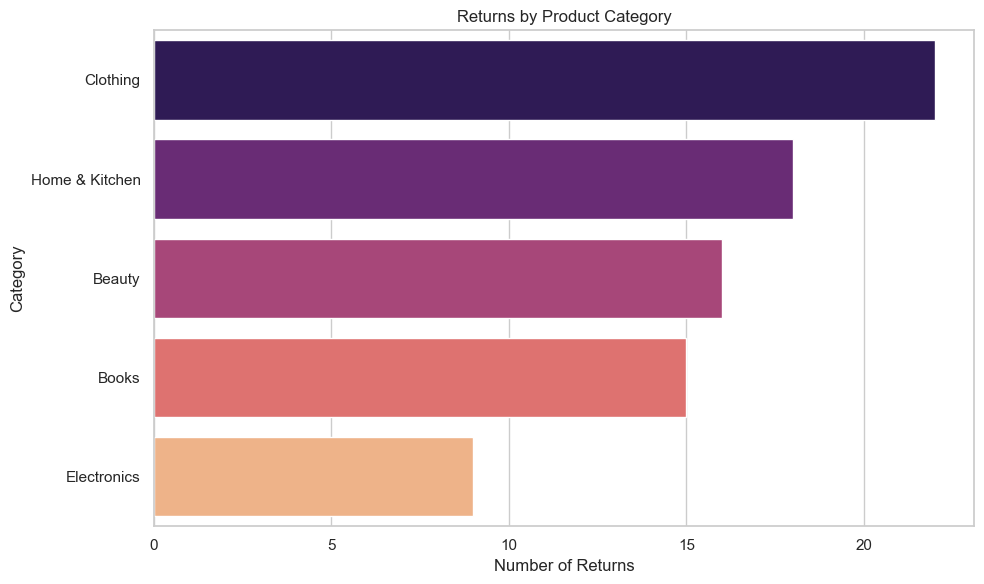

In [4]:
# 📌 Step 5: Returns by Category
category_return = df[df['is_returned'] == True].groupby('category')['order_id'].count().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=category_return.values, y=category_return.index, palette="magma")
plt.title("Returns by Product Category")
plt.xlabel("Number of Returns")
plt.ylabel("Category")
plt.tight_layout()
plt.show()


In [5]:
# 📌 Step 6: Risky Customers (3+ Returns)
risky = df[df['is_returned']].groupby('user_id')['order_id'].count()
risky = risky[risky > 2].sort_values(ascending=False)
risky.head(10)


user_id
U0069    4
U0099    4
U0090    4
U0016    3
U0019    3
U0058    3
U0023    3
U0076    3
U0095    3
Name: order_id, dtype: int64

In [7]:
# 📌 Step 7 (Optional): Time-based Return Trend
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    monthly_returns = df[df['is_returned']].groupby(df['timestamp'].dt.to_period('M')).size()

    monthly_returns.plot(kind='bar', figsize=(12, 5), title='Monthly Return Volume')
